<a href="https://colab.research.google.com/github/amelliaaas/TugasTKC_282-305/blob/main/100_TKC_CNN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/COVID-19_Radiography/dataset

/content/drive/MyDrive/COVID-19_Radiography/dataset


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

import os
import random
import cv2
from tqdm import tqdm

In [ ]:
labels = ['Covid', 'Normal', 'Viral Pneumonia']
IMG_SIZE = 124

In [ ]:
# load all the images
def loadData(DIR):
    X = []
    Y = []
    for label in labels:
        path = os.path.join(DIR, label)
        class_num = labels.index(label)
        for img in tqdm(os.listdir(path)):
            try:
                arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(arr, (IMG_SIZE, IMG_SIZE))
                X.append(resized_arr)
                Y.append(class_num)
            except Exception as e:
                print(e)
    return (np.array(X), np.array(Y))

In [ ]:
DIR = '/content/drive/MyDrive/COVID-19_Radiography/dataset'
(X, Y) = loadData(DIR)

100%|██████████| 1350/1350 [00:23<00:00, 57.07it/s] 


## Visualisasi Data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


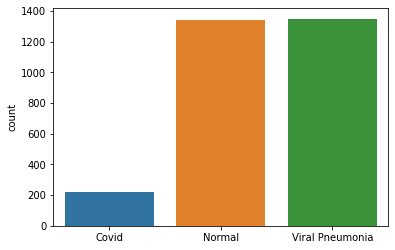

In [ ]:
l = []
for img in Y:
    l.append(labels[img])
sns.countplot(l);

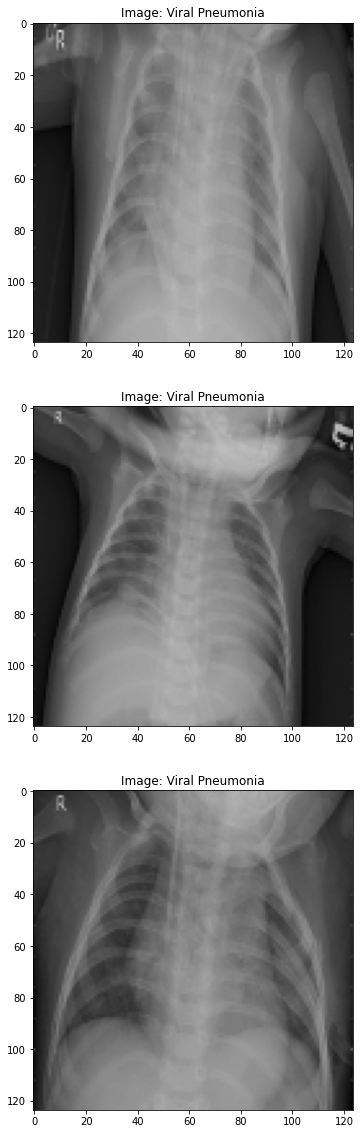

In [ ]:
fig, ax = plt.subplots(3)
fig.set_size_inches(15, 20)
for i in range(3):
        l = random.randint(0, len(X))
        ax[i].imshow(X[l])
        ax[i].set_title('Image: ' + labels[Y[l]])

## Preprocessing data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
# normalize the data
X = X / 255

# reshape the data
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
Y = Y.reshape(-1, 1)
Y = keras.utils.to_categorical(Y, 3)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

# Explore the dataset
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))

X_train shape:(2037, 124, 124, 3)
Y_train shape:(2037, 3)
X_test shape:(873, 124, 124, 3)
Y_test shape:(873, 3)


## CNN Model from scratch

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten,BatchNormalization
from keras.layers import Dense

In [ ]:
model = Sequential(
    [
        Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 64, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 128, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 256, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
        
        Conv2D(filters = 512, kernel_size = (3, 3), padding = 'same', activation = 'relu'),
        MaxPool2D(pool_size = (2, 2), strides = (2, 2)),
     
        Flatten(),
        Dense(1024, activation = 'relu'),
        Dropout(0.5),
        Dense(3, activation = 'softmax')
    ]
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 124, 124, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0

In [ ]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs = 100, validation_split = 0.2)

Epoch 1/100
51/51 [==============================] - 14s 78ms/step - loss: 0.7481 - accuracy: 0.6556 - val_loss: 0.4778 - val_accuracy: 0.8039
Epoch 2/100
51/51 [==============================] - 3s 52ms/step - loss: 0.4395 - accuracy: 0.8244 - val_loss: 0.3789 - val_accuracy: 0.8652
Epoch 3/100
51/51 [==============================] - 3s 52ms/step - loss: 0.2743 - accuracy: 0.8993 - val_loss: 0.2690 - val_accuracy: 0.9142
Epoch 4/100
51/51 [==============================] - 3s 52ms/step - loss: 0.1986 - accuracy: 0.9306 - val_loss: 0.2127 - val_accuracy: 0.9436
Epoch 5/100
51/51 [==============================] - 3s 51ms/step - loss: 0.1476 - accuracy: 0.9429 - val_loss: 0.3029 - val_accuracy: 0.9167
Epoch 6/100
51/51 [==============================] - 3s 52ms/step - loss: 0.1425 - accuracy: 0.9503 - val_loss: 0.2564 - val_accuracy: 0.9069
Epoch 7/100
51/51 [==============================] - 3s 52ms/step - loss: 0.1015 - accuracy: 0.9669 - val_loss: 0.2605 - val_accuracy: 0.9338
Epoch

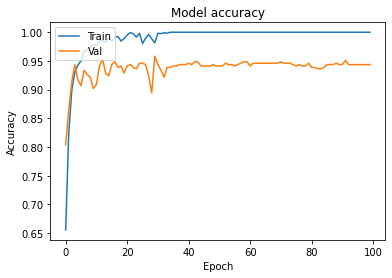

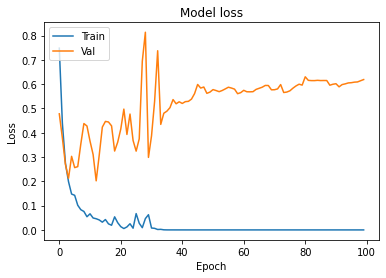

In [ ]:
# plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [ ]:
# find the accuracy on train and test set
train_loss, train_acc = model.evaluate(X_train, Y_train)
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(test_acc * 100)  + "%")

28/28 [==============================] - 1s 25ms/step - loss: 0.3613 - accuracy: 0.9565
Accuracy on train set is 98.870891%
Accuracy on validation set is 95.647192%


In [ ]:
#save model.h5
model.save('model_cnn7_tkc.h5')

In [ ]:
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis = 1)
Y_test = np.argmax(Y_test, axis = 1)

# get the correctly and incorrectly labelled images
correct = np.nonzero(Y_pred == Y_test)[0]
incorrect = np.nonzero(Y_pred != Y_test)[0]

print("correct shape:" + str(correct.shape))
print("incorrect shape:" + str(incorrect.shape))

# Classification Report
print(classification_report(Y_test, Y_pred))

correct shape:(835,)
incorrect shape:(38,)
              precision    recall  f1-score   support

           0       0.89      0.85      0.87        66
           1       0.94      0.97      0.96       399
           2       0.98      0.96      0.97       408

    accuracy                           0.96       873
   macro avg       0.94      0.93      0.93       873
weighted avg       0.96      0.96      0.96       873



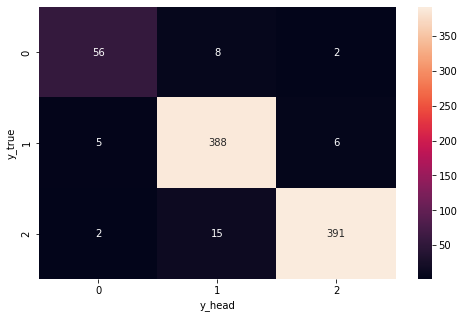

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [ ]:

!pip install pyyaml h5py
model_json = model.to_json()
with open("model_cnn6_tkc.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_cnn6_tkc.hdf5")
print("Saved model to disk")

Saved model to disk
